# Covid-19 and its impact on utilization and demographics Case Study!


We are in a covid-19 pandemic and there is a larger need to understand its impact on several factors. One of the most important aspect is to understand if we have enough number of hospital beds available in the future. I conducted detailed analysis on covid-19 case data in an effort to find out how the forecast looks like for the number of hospital beds for next 4 weeks.

For this analysis i am focusing on the top 5 states with most number of positives.

### Data
I have used three different files for this analysis:
1. Daily.csv : Daily count of covid data by state
2. Covid count by AGE, SEX , RACE and state
3. Hospital utilization for california state 

### Daily.csv(Daily count of covid data) is the primary file used for exploratory analysis. This file contains the following fields.

Field Name	: Description
1. date: Date on which data was collected by The COVID Tracking Project.
2. state: Two-letter abbreviation for the state or territory.
3. positive: Individuals with confirmed or probable COVID-19 per the expanded 
4. negative: Date and time in Eastern time the state or territory last updated the data.
5. pending: Deprecated
6. hospitalizedCurrently: Individuals who are currently hospitalized with COVID-19
7. hospitalizedCumulative: Total number of individuals who have ever been hospitalized with COVID-19. 
8. inIcuCurrently: Individuals who are currently hospitalized in the Intensive Care Unit with COVID-19
9. inIcuCumulative: Total number of individuals who have ever been hospitalized in the Intensive Care Unit with COVID-19. 
10. onVentilatorCurrently: Individuals who are currently hospitalized under advanced ventilation with COVID-19. 
11. onVentilatorCumulative: Total number of individuals who have ever been hospitalized under advanced ventilation with COVID-19 
12. recovered: Individuals who have recovered from COVID-19.
13. dataQualityGrade: The COVID Tracking Project grade of the completeness of the data reporting by a state.
14. lastUpdateEt: Date and time in Eastern time the state or territory last updated the data.
15. dateModified: Deprecated, use lastUpdateEt instead
16. checkTimeEt: Deprecated
17. death: Total fatalities with confirmed OR probable COVID-19 case diagnosis 
18. hospitalized: Deprecated
19. dateChecked: Deprecated
20. totalTestsViral: Completed viral tests.
21. positiveTestsViral: Completed viral tests that returned positive results.
22. negativeTestsViral: Completed viral tests that returned negative results.
23. positiveCasesViral: Individuals with a completed viral test that returned a positive result.
24. deathConfirmed: Total fatalities with confirmed COVID-19 case diagnosis 
25. deathProbable: Total fatalities with probable COVID-19 case diagnosis 
26. fips: Federal Information Processing Standards (FIPS) code for the state or territory.
27. positiveIncrease: Increase in *positive* computed by subtracting the value of *positive* from the previous day from the value of *positive* for the current day.
24. negativeIncrease: Individuals with a completed viral test that returned a negative result
25. total: Deprecated
26. totalTestResults: Currently computed by adding *positive* and *negative* values to work around reporting lags between positives and total tests and because some states do not report totals.
27. totalTestResultsIncrease: Daily Difference in totalTestResults
28. posNeg: 	
29. deathIncrease: Daily difference in death
30. hospitalizedIncrease: Daily difference in hospitalized
31. hash: Deprecated
32. commercialScore: Deprecated
33. negativeRegularScore: Deprecated
34. negativeScore: Deprecated
35. positiveScore: Deprecated
36. score: Deprecated
37. grade: Deprecated

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
Daily_df = pd.read_csv("C:/Users/ysman/Documents/springboard/CAPSTONE 2/Covid/covidpython/uscovid0811.csv")

In [160]:
Daily_df['recovered'].fillna(0, inplace=True)
Daily_df['death'].fillna(0, inplace=True)

In [162]:
Daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8137 entries, 0 to 8136
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      8137 non-null   int64  
 1   state                     8137 non-null   object 
 2   positive                  8122 non-null   float64
 3   negative                  7981 non-null   float64
 4   pending                   1058 non-null   float64
 5   hospitalizedCurrently     5564 non-null   float64
 6   hospitalizedCumulative    4334 non-null   float64
 7   inIcuCurrently            2834 non-null   float64
 8   inIcuCumulative           1170 non-null   float64
 9   onVentilatorCurrently     2480 non-null   float64
 10  onVentilatorCumulative    414 non-null    float64
 11  recovered                 8137 non-null   float64
 12  dataQualityGrade          7036 non-null   object 
 13  lastUpdateEt              7793 non-null   object 
 14  dateModi

In [ ]:
covid0728[Daily_df['date'] == 20200728]

In [ ]:

Daily_df['closed'] = USCovidFr['death'] + USCovidFr['recovered']

# Get open cases ('positive' - 'closed')
USCovidFr['open'] = USCovidFr['positive'] - USCovidFr['closed']

### Filter the dataset for desired columns

In [6]:
filt_in = ['date', 'state', 'positive', 'negative', 'pending', 'hospitalizedCurrently', 'hospitalizedCumulative', 
           'inIcuCurrently', 'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative', 'recovered', 
            'death', 'hospitalized', 'totalTestsViral', 'positiveTestsViral', 
           'negativeTestsViral', 'positiveCasesViral', 'deathConfirmed', 'deathProbable', 'positiveIncrease',
           'negativeIncrease', 'total', 'totalTestResults', 'totalTestResultsIncrease', 'deathIncrease', 'hospitalizedIncrease']
daily = Daily_df[filt_in]

In [ ]:
daily = daily.rename(columns =  {'positive':'positive to date'}, {'negative':'negative to date'}, )

### Find out the total positives for each state as of 07/28/20 and find the top 5 affected states.

### The top 5 affected states by number of positives

In [9]:
statelist = daily_0728['state'].tolist()

top5_statelist=statelist[:5]
print(top5_statelist)
top5_states = daily[daily['state'].isin(top5_statelist)]
top5_states.head(10)

['CA', 'FL', 'NY', 'TX', 'NJ']


,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,positiveCasesViral,deathConfirmed,deathProbable,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,deathIncrease,hospitalizedIncrease
0,20200728,CA,466550.0,6951316.0,NaN,8317.0,NaN,2198.0,NaN,NaN,...,466550.0,NaN,NaN,6000,115288,7417866,7417866,121288,73,0
1,20200727,CA,460550.0,6836028.0,NaN,8820.0,NaN,2284.0,NaN,NaN,...,460550.0,NaN,NaN,6891,121548,7296578,7296578,128439,29,0
2,20200726,CA,453659.0,6714480.0,NaN,8820.0,NaN,2284.0,NaN,NaN,...,453659.0,NaN,NaN,8259,112525,7168139,7168139,120784,79,0
3,20200725,CA,445400.0,6601955.0,NaN,8820.0,NaN,2284.0,NaN,NaN,...,445400.0,NaN,NaN,10066,121413,7047355,7047355,131479,151,0
4,20200728,FL,441977.0,3038322.0,3017.0,8992.0,25280.0,NaN,NaN,NaN,...,441977.0,6240.0,NaN,9230,39572,3483316,3480299,48802,191,590
5,20200724,CA,435334.0,6480542.0,NaN,8820.0,NaN,2284.0,NaN,NaN,...,435334.0,NaN,NaN,9718,127854,6915876,6915876,137572,159,0
6,20200727,FL,432747.0,2998750.0,2902.0,9098.0,24690.0,NaN,NaN,NaN,...,432747.0,6049.0,NaN,8892,36102,3434399,3431497,44994,77,269
7,20200723,CA,425616.0,6352688.0,NaN,8820.0,NaN,2284.0,NaN,NaN,...,425616.0,NaN,NaN,12040,101845,6778304,6778304,113885,157,0
8,20200726,FL,423855.0,2962648.0,2871.0,8951.0,24421.0,NaN,NaN,NaN,...,423855.0,5972.0,NaN,9344,40782,3389374,3386503,50126,78,335
9,20200725,FL,414511.0,2921866.0,2850.0,9035.0,24086.0,NaN,NaN,NaN,...,414511.0,5894.0,NaN,12199,47542,3339227,3336377,59741,126,511


### Correlation Matrix for analyzing 'Total Hospitalized vs other variables'

Correlation shows us that Hospitalized curently is corelated positively with positive increase, inICUcurrently, onVentilatorCurrently, 

In [10]:
corr = top5_states.corr()
corr.style.background_gradient(cmap='Greens')

C:\Users\ysman\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\ysman\anaconda3\lib\site-packages\pandas\io\formats\style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
C:\Users\ysman\anaconda3\lib\site-packages\pandas\io\formats\style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,date,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,deathIncrease,hospitalizedIncrease
date,1.000000,0.734186,0.794353,-0.210785,-0.086616,0.236990,-0.464464,nan,-0.872962,nan,0.611255,0.503182,0.236990,0.799792,0.866210,0.928532,0.668361,0.259738,0.644831,0.402011,0.702224,0.803693,0.803959,0.707973,-0.043613,-0.089510
positive,0.734186,1.000000,0.790337,-0.151562,0.229818,0.884726,-0.013134,nan,-0.276514,nan,0.624015,0.821395,0.884726,0.923454,0.999941,0.979881,0.999999,0.267494,0.695120,0.427157,0.710643,0.825118,0.825329,0.718622,0.176095,0.063599
negative,0.794353,0.790337,1.000000,-0.185556,0.027320,0.588972,-0.206268,nan,-0.608633,nan,0.622840,0.478725,0.588972,0.988947,0.973364,0.999161,0.755650,-0.164214,0.718257,0.421268,0.875963,0.998572,0.998563,0.875466,-0.102271,-0.109783
pending,-0.210785,-0.151562,-0.185556,1.000000,-0.716321,0.713968,-0.889257,nan,0.150133,nan,nan,-0.253051,0.713968,-0.516496,0.847878,0.827001,0.734682,0.850966,nan,-0.091926,-0.174885,-0.168703,-0.181833,-0.165581,-0.091636,-0.227283
hospitalizedCurrently,-0.086616,0.229818,0.027320,-0.716321,1.000000,-0.027970,0.986991,nan,0.983430,nan,0.243987,-0.109168,-0.027970,0.698617,0.765011,0.777405,0.353153,-0.979790,-0.648871,0.773642,0.099145,0.044028,0.044464,0.177644,0.679980,0.395822
hospitalizedCumulative,0.236990,0.884726,0.588972,0.713968,-0.027970,1.000000,0.085179,nan,0.314941,nan,0.922711,0.909433,1.000000,0.998572,0.988825,0.997505,0.871755,0.723951,0.749134,-0.082047,0.674084,0.632331,0.632606,0.645904,0.135024,-0.023561
inIcuCurrently,-0.464464,-0.013134,-0.206268,-0.889257,0.986991,0.085179,1.000000,nan,0.994670,nan,0.044898,-0.267713,0.085179,0.641300,nan,nan,0.078061,-0.992465,-0.780452,0.751226,-0.086951,-0.197084,-0.196297,-0.017452,0.685616,0.401809
inIcuCumulative,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
onVentilatorCurrently,-0.872962,-0.276514,-0.608633,0.150133,0.983430,0.314941,0.994670,nan,1.000000,nan,-0.096277,-0.407155,0.314941,nan,nan,nan,-0.009309,-0.995019,-0.844241,0.869283,-0.402328,-0.590429,-0.590435,-0.371010,0.471042,0.040601
onVentilatorCumulative,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [101]:
from datetime import datetime, timedelta
from pandas import DataFrame

In [14]:
top5_states['date'] = pd.to_datetime(top5_states['date'].astype(str), format='%Y/%m/%d')
statelist = ['CA', 'FL', 'NY', 'TX', 'NJ']
filt2 = ['death','positive', 'negative', 'hospitalizedCurrently', 
           'inIcuCurrently', 'onVentilatorCurrently', 'recovered']
colList = top5_states[filt2].columns

C:\Users\ysman\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
for co in colList:
    ax = sns.lmplot(x='hospitalizedIncrease', y=co, data=top5_states, col='state')
    ax.set_xticklabels(
    rotation=45,
    horizontalalignment='right',
    fontsize=10,
    label='medium')

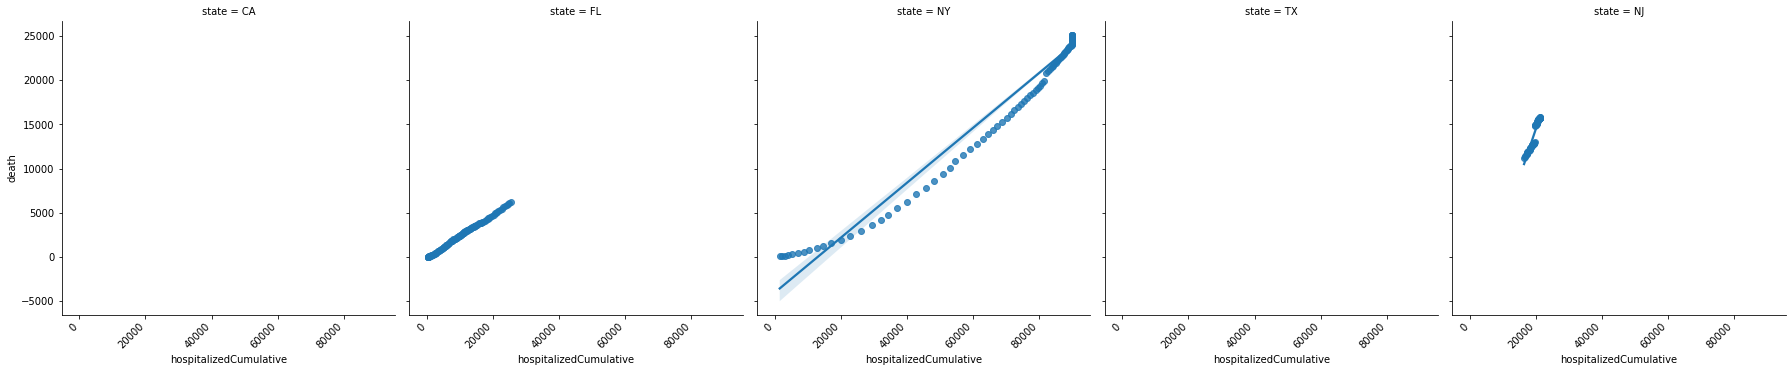

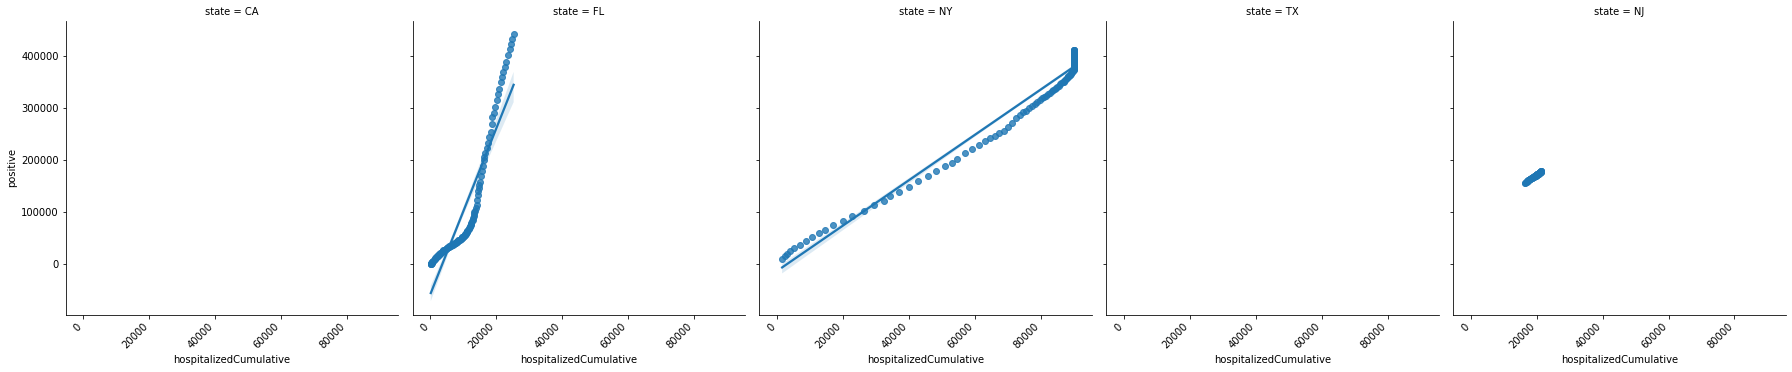

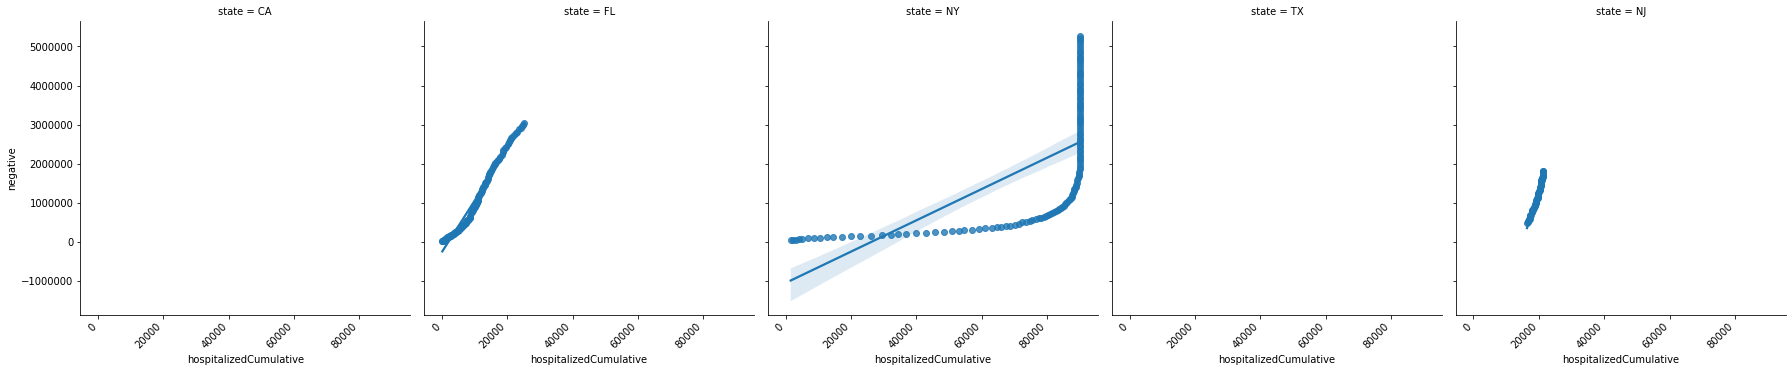

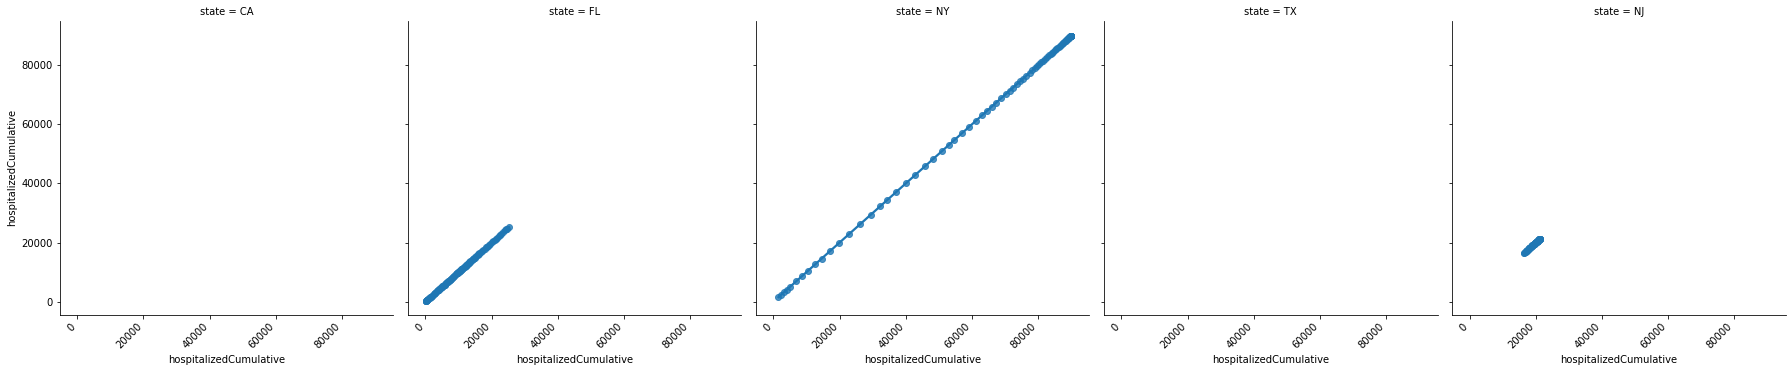

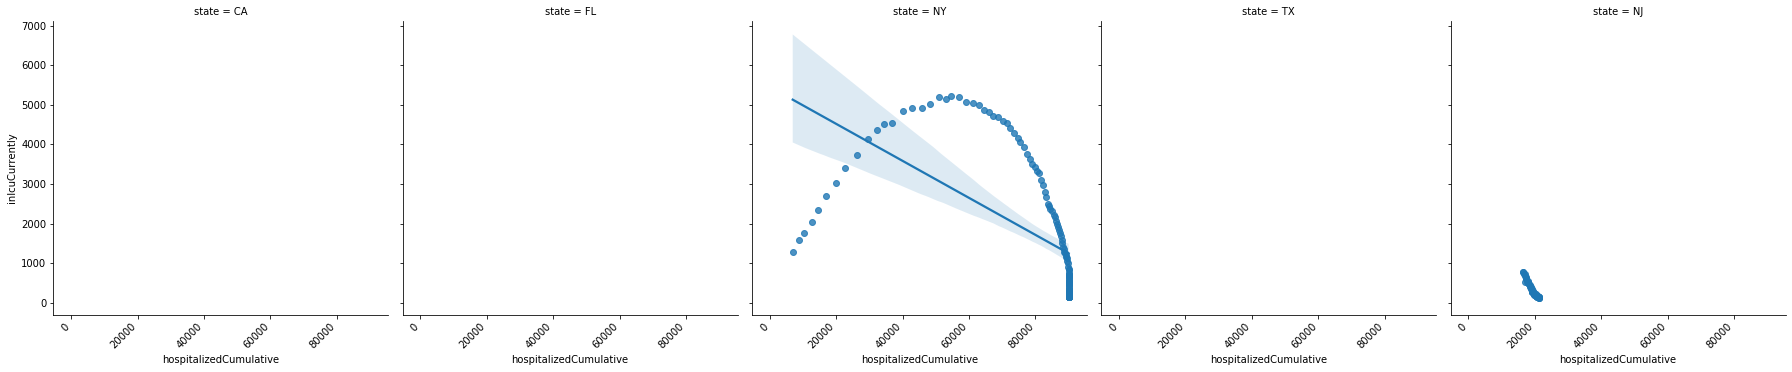

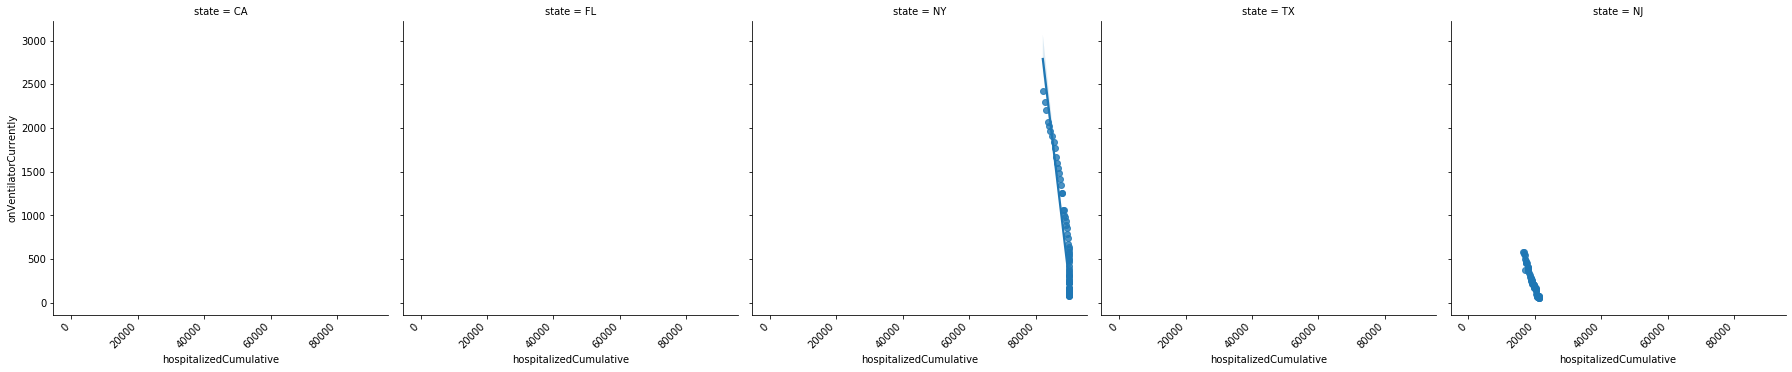

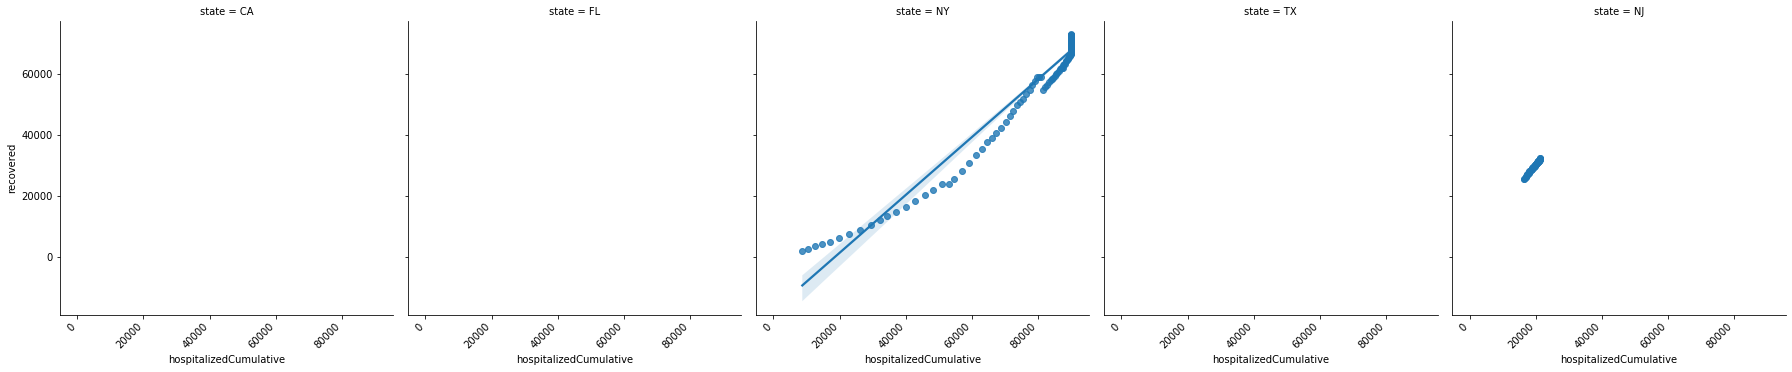

In [15]:

for co in colList:
    ax = sns.lmplot(x='hospitalizedCumulative', y=co, data=top5_states, col='state')
    ax.set_xticklabels(
    rotation=45,
    horizontalalignment='right',
    fontsize=10,
    label='medium')


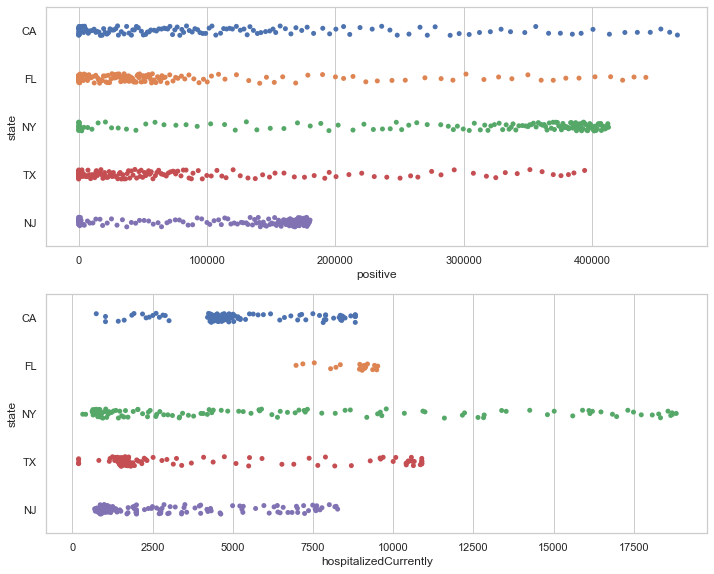

In [158]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.tight_layout()

plt.subplot(2,1,1)
sns.stripplot(x='positive', y='state', data=top5_states)
ax.set_ylabel("Total Death", fontsize=20)
ax.tick_params(labelsize=20)


# Make the strip plot again using jitter and a smaller point size
plt.subplot(2,1,2)
sns.stripplot(x='hospitalizedCurrently', y='state',data=top5_states, jitter=True, size=5)
ax.set_ylabel("Total Death", fontsize=20)
ax.tick_params(labelsize=20)

# Display the plot
plt.show()


In [122]:
demodf = pd.read_csv("C:/Users/ysman/Documents/springboard/CAPSTONE 2/Covid/covidpython/Cumulative_Death_Counts_by_Sex__Race__and_Age_0804.csv")

In [123]:
demodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 25 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Data as of                                                                                         120 non-null    object 
 1   Sex                                                                                                120 non-null    object 
 2   Race/Ethnicity                                                                                     120 non-null    object 
 3   Age group                                                                                          120 non-null    object 
 4   Year                                                                                               120 non-null    int64  

In [124]:
keep_these = ['Data as of', 'Sex', 'Race/Ethnicity', 'Age group', 'Year',
       'COVID-19 (U071, Multiple Cause of Death)',
       'COVID-19 (U071, Underlying Cause of Death)']

In [125]:
demodf = demodf[keep_these]

In [126]:
demodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Data as of                                  120 non-null    object
 1   Sex                                         120 non-null    object
 2   Race/Ethnicity                              120 non-null    object
 3   Age group                                   120 non-null    object
 4   Year                                        120 non-null    int64 
 5   COVID-19 (U071, Multiple Cause of Death)    120 non-null    int64 
 6   COVID-19 (U071, Underlying Cause of Death)  120 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 6.7+ KB


In [127]:
demodf.head()

,Data as of,Sex,Race/Ethnicity,Age group,Year,"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
0,8/4/2020,Female (F),Hispanic,0-4 years,2020,6,3
1,8/4/2020,Female (F),Hispanic,5-14 years,2020,1,1
2,8/4/2020,Female (F),Hispanic,15-24 years,2020,27,24
3,8/4/2020,Female (F),Hispanic,25-34 years,2020,99,92
4,8/4/2020,Female (F),Hispanic,35-44 years,2020,233,218


In [133]:
demodf= demodf.rename(columns = {'COVID-19 (U071, Multiple Cause of Death)':'Multiple Cause'})
demodf= demodf.rename(columns = {'COVID-19 (U071, Underlying Cause of Death)':'Underlying Cause'})
demodf = demodf.rename(columns = {'Data as of':'Date'})

In [134]:
demodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              120 non-null    object
 1   Sex               120 non-null    object
 2   Race/Ethnicity    120 non-null    object
 3   Age group         120 non-null    object
 4   Year              120 non-null    int64 
 5   Multiple Cause    120 non-null    int64 
 6   Underlying Cause  120 non-null    int64 
 7   total deaths      120 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 7.6+ KB


In [130]:
demodf['total deaths'] = demodf['Multiple Cause'] + demodf['Underlying Cause']

In [135]:
demodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              120 non-null    object
 1   Sex               120 non-null    object
 2   Race/Ethnicity    120 non-null    object
 3   Age group         120 non-null    object
 4   Year              120 non-null    int64 
 5   Multiple Cause    120 non-null    int64 
 6   Underlying Cause  120 non-null    int64 
 7   total deaths      120 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 7.6+ KB


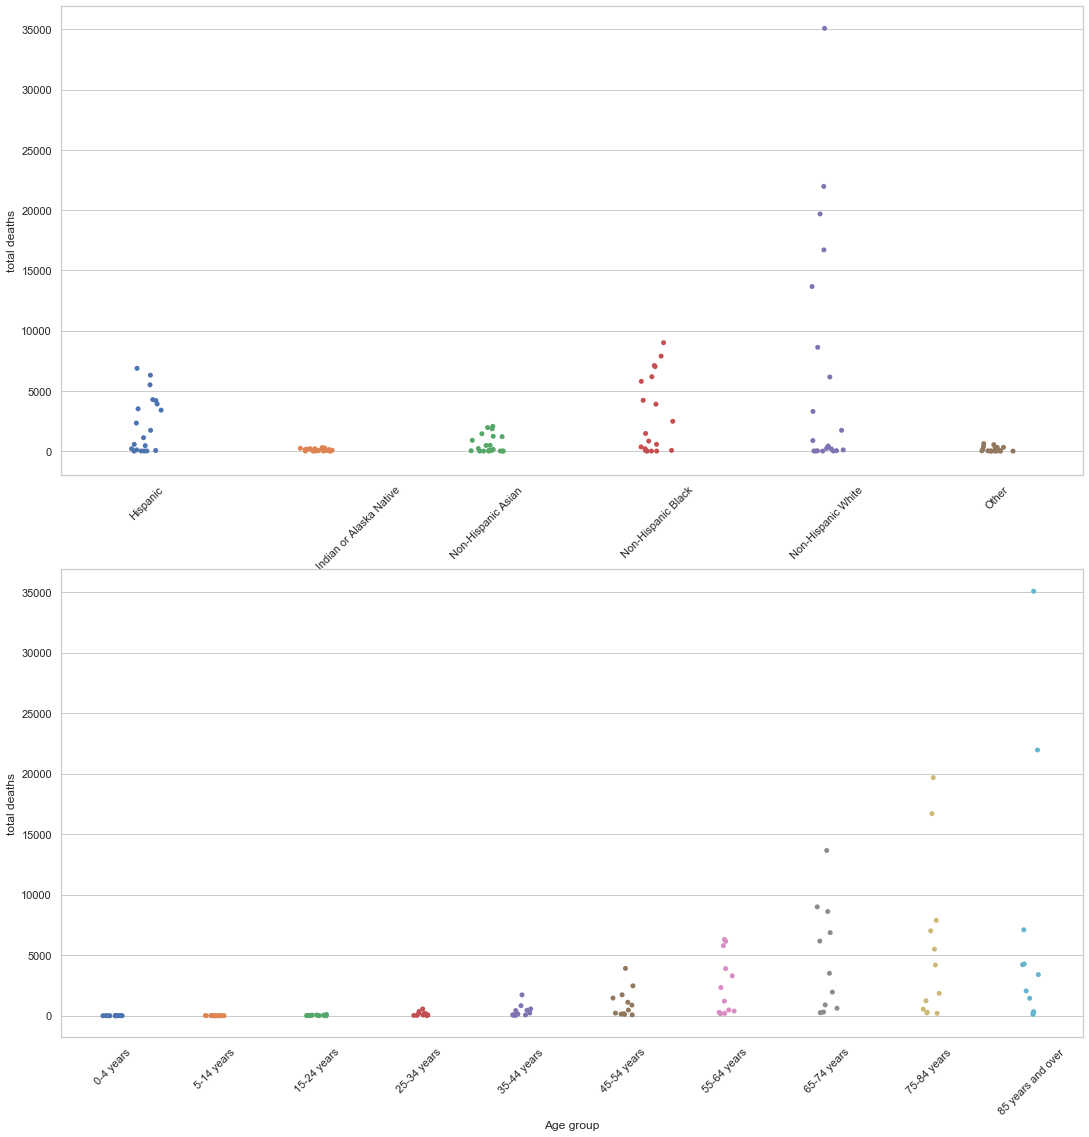

In [153]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.tight_layout()

plt.subplot(2,1,1)
sns.stripplot(x='Race/Ethnicity', y='total deaths', data=demodf)
ax.set_ylabel("Total Death", fontsize=20)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45)

# Make the strip plot again using jitter and a smaller point size
plt.subplot(2,1,2)
sns.stripplot(x='Age group', y='total deaths',data=demodf, jitter=True, size=5)
ax.set_ylabel("Total Death", fontsize=20)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45)

# Display the plot
plt.show()



<Figure size 720x360 with 0 Axes>

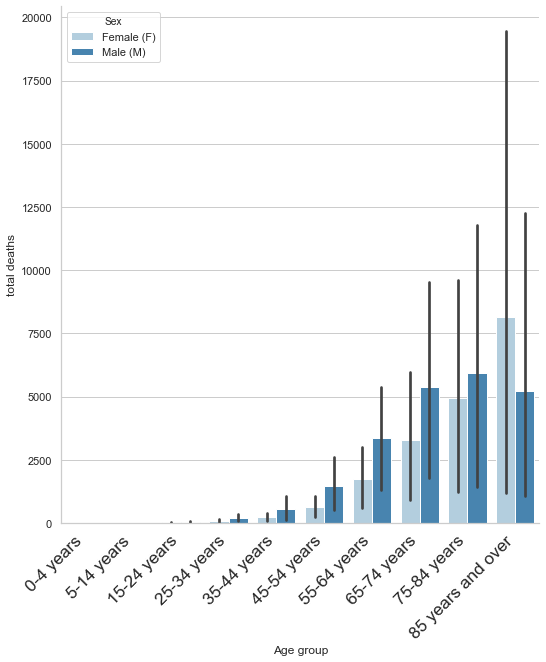

In [156]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
g = sns.catplot('Age group', 'total deaths', 'Sex',
                    data=demodf, kind='bar',
                    height=8, palette='Blues',
                   legend_out=False)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
g.set_ylabels('total deaths')


In [80]:
statedemodf = pd.read_csv("C:/Users/ysman/Documents/springboard/CAPSTONE 2/Covid/covidpython/Gender__Age__and_State.csv")

In [81]:
statedemodf.head()

,Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,8/5/2020,2/1/2020,8/1/2020,United States,All,Under 1 year,15,"8,832",82,2,14,109,NaN
1,8/5/2020,2/1/2020,8/1/2020,United States,All,1-4 years,10,"1,690",55,2,41,104,NaN
2,8/5/2020,2/1/2020,8/1/2020,United States,All,5-14 years,20,"2,611",86,6,50,150,NaN
3,8/5/2020,2/1/2020,8/1/2020,United States,All,15-24 years,225,"16,353",326,77,52,522,NaN
4,8/5/2020,2/1/2020,8/1/2020,United States,All,25-34 years,"1,074","33,993","1,250",477,150,"1,983",NaN
